In [31]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [59]:
# Read in the data and reduce it to only city demographics
cali_data = pd.read_csv("data/cali_combined.csv")
cali_data.rename(columns={"Unnamed: 0":"city_id"}, inplace=True)

# Being lazy and just filling in NAs for race columnswith the mean of the data
race_data = cali_data[['share_white', 'share_black',
       'share_native_american', 'share_asian', 'share_hispanic']]
race_data.fillna(race_data.mean(), inplace=True)
race_data.isna().sum()

share_white              0
share_black              0
share_native_american    0
share_asian              0
share_hispanic           0
dtype: int64

In [61]:
# Simplify the race information
majority = []
# 0 = black
# 1 = native american
# 2 = asian
# 3 = hispanic
# 4 = white
for index, row in race_data.iterrows():
    if (row['share_black'] >= 50):
        majority.append(0)
    elif (row['share_native_american'] >= 50):
        majority.append(1)
    elif (row['share_asian'] >= 50):
        majority.append(2)
    elif (row['share_hispanic'] >= 50):
        majority.append(3)
    else:
        majority.append(4)

cities = cali_data[['city_id', 'Median Income',
       'percent_completed_hs', 'poverty_rate']]
cities["majority"] = majority
cities.head()

,city_id,Median Income,percent_completed_hs,poverty_rate,majority
0,0,81294.0,87.0,13.2,4
1,1,44797.0,74.9,25.3,4
2,2,43552.0,52.4,20.0,3
3,3,67364.0,85.6,13.2,4
4,4,105355.0,92.3,6.1,2


In [62]:
# Being lazy and just filling in NAs with the median of the data
cities.fillna(cities.median(), inplace=True)
cities.isna().sum()

city_id                 0
Median Income           0
percent_completed_hs    0
poverty_rate            0
majority                0
dtype: int64

In [68]:
# Ok let's get into the ML part...
data = np.array(cities.drop("city_id",1))
kmeans = KMeans(n_clusters=3)
kmeans.fit(data)

KMeans(n_clusters=3)

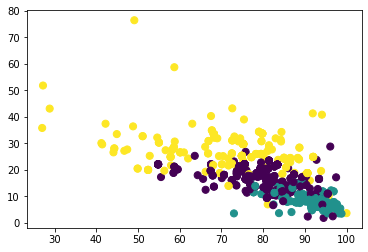

In [71]:
prediction = kmeans.predict(data)

plt.scatter(data[:, 1], data[:, 2], c=prediction, s=50, cmap='viridis')
plt.show()